In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('rossmann.csv', skipinitialspace=True)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day

/Users/paulomacasaet/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1. Plot the distribution of series by month and compare the efect of promotions

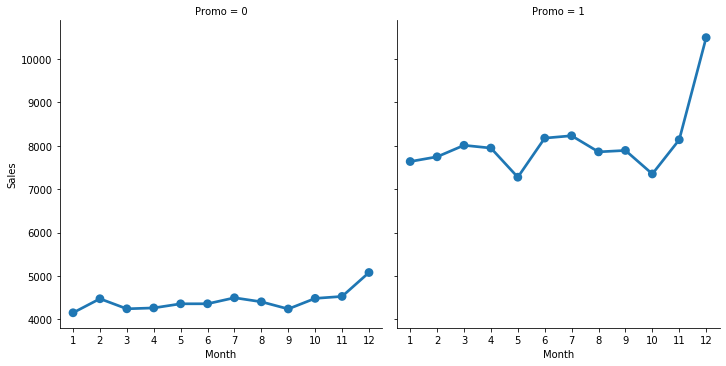

In [3]:

sns.catplot(
    col='Promo',
    x='Month',
    y='Sales',
    data=data,
    kind='point'
)

2. Are sales more correlated with the prior day or a similar data last month/year?

In [4]:
print(data['Sales'].resample('D').mean().autocorr(lag=1))
print(data['Sales'].resample('D').mean().autocorr(lag=28))
print(data['Sales'].resample('M').mean().autocorr(lag=1))
print(data['Sales'].resample('A').mean().autocorr(lag=1))

-0.025858276006383588
0.7181121160532807
0.1380854873922839
0.9999999999999999


3. 15 day rolling mean

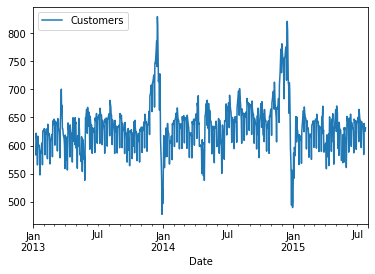

In [5]:
data[['Customers']].resample('D').mean().rolling(window=15, center=True).mean().plot()

4. Identify the date with largest drop in sales from the same date in the previous month


In [17]:
daily = data['Sales'].resample('D').sum().to_frame()

daily['Year'] = daily.index.year
daily['Month'] = daily.index.month
daily['Day'] = daily.index.day
x = daily.sort_values(by=['Day', 'Year'])
res = x[['Sales']].diff(periods=1)
print(res.sort_values(by=['Sales'], ascending=True).head())
# print(res.idxmin())
# print(res['2014-01-19'])
# print(res.min())

                 Sales
Date                  
2014-01-19 -11564495.0
2013-04-28 -11212755.0
2015-05-31 -10944223.0
2015-05-01 -10837799.0
2015-01-01 -10146809.0


5. Compute the total sales up until Dec 2014

In [7]:

month_year = data.groupby(['Year'])['Sales'].sum()
print(month_year[:2].sum())

4483680980


6. When were the largest differences between 15-day moving/rolling averages?


In [8]:
rolling15 = data[['Sales']].resample('D').mean().rolling(window=15, center=True).mean()
largest = rolling15.diff(periods=1).sort_values(by=['Sales'], ascending=False).head()
print(largest)

                 Sales
Date                  
2013-12-09  920.987444
2014-12-08  847.866310
2013-12-16  846.632646
2014-06-23  781.484544
2014-12-15  770.850053
